In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.datasets import make_classification

import sklearn
from sklearn.model_selection import train_test_split #train test package
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [30]:
df=pd.read_csv("C:/Users/jpadmanabhan/Downloads/train.csv")
df2=pd.read_csv("C:/Users/jpadmanabhan/Downloads/test.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### DATA PREPROCESSING

In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [34]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
df2['Fare'].fillna(df2['Fare'].median(), inplace = True)

In [36]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df2['Age'].fillna(df2['Age'].median(), inplace = True)

In [37]:
df.drop(["Name", "Ticket", "Cabin"],axis = 1, inplace=True)
df2.drop(["Name", "Ticket", "Cabin"],axis = 1, inplace=True)

In [38]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [29]:
#df2['Fare'] = df2['Fare'].fillna(df2['Fare'].mean())

In [30]:
#df['Age'] = df['Age'].fillna(df['Age'].median())

In [31]:
#df2['Age'] = df2['Age'].fillna(df2['Age'].median())

In [32]:
#df['Cabin'] = pd.to_numeric(df['Cabin'].str.extract('(\d+)')[0],errors='coerce') #remove letter from string number combined
#df2['Cabin'] = pd.to_numeric(df2['Cabin'].str.extract('(\d+)')[0],errors='coerce')

#df['Cabin'] = df['Cabin'].fillna(0)
#df2['Cabin'] = df2['Cabin'].fillna(0)

In [193]:
df.dropna(inplace=True)

In [54]:
lb = LabelEncoder()
df['Sex'] = lb.fit_transform(df['Sex']) #LABEL ENCODING
df2['Sex'] = lb.fit_transform(df2['Sex']) #LABEL ENCODING

In [39]:
#dfE = pd.get_dummies(df['Embarked'])

df = pd.get_dummies(df, columns = ['Embarked'])
df2 = pd.get_dummies(df2, columns = ['Embarked'])

df = pd.get_dummies(df, columns = ['Sex'])
df2 = pd.get_dummies(df2, columns = ['Sex'])

#df = df.assign(pd.get_dummies(df['Embarked']))
#df.drop([df['Embarked']], axis=1, inplace=True)

#df = df.replace(to_replace = ['S','Q','C'],value = ['0','1','2'])
#df2 = df2.replace(to_replace = ['S','Q','C'],value = ['0','1','2'])

In [40]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)
#df['Cabin'] = df['Cabin'].astype(int)
df['Sex_female'] = df['Sex_female'].astype(int)
df['Sex_male'] = df['Sex_male'].astype(int)
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

df2['Age'] = df2['Age'].astype(int)
df2['Fare'] = df2['Fare'].astype(int)
df2['Sex_female'] = df2['Sex_female'].astype(int)
df2['Sex_male'] = df2['Sex_male'].astype(int)
df2['Embarked_C'] = df2['Embarked_C'].astype(int)
df2['Embarked_Q'] = df2['Embarked_Q'].astype(int)
df2['Embarked_S'] = df2['Embarked_S'].astype(int)

In [42]:
df.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Age            int32
SibSp          int64
Parch          int64
Fare           int32
Embarked_C     int32
Embarked_Q     int32
Embarked_S     int32
Sex_female     int32
Sex_male       int32
dtype: object

In [43]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,22,1,0,7,0,0,1,0,1
1,2,1,1,38,1,0,71,1,0,0,1,0
2,3,1,3,26,0,0,7,0,0,1,1,0
3,4,1,1,35,1,0,53,0,0,1,1,0
4,5,0,3,35,0,0,8,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27,0,0,13,0,0,1,0,1
887,888,1,1,19,0,0,30,0,0,1,1,0
888,889,0,3,28,1,2,23,0,0,1,1,0
889,890,1,1,26,0,0,30,1,0,0,0,1


In [44]:
df2

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,3,34,0,0,7,0,1,0,0,1
1,893,3,47,1,0,7,0,0,1,1,0
2,894,2,62,0,0,9,0,1,0,0,1
3,895,3,27,0,0,8,0,0,1,0,1
4,896,3,22,1,1,12,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27,0,0,8,0,0,1,0,1
414,1306,1,39,0,0,108,1,0,0,1,0
415,1307,3,38,0,0,7,0,0,1,0,1
416,1308,3,27,0,0,8,0,0,1,0,1


### TRAINING MODEL 

In [45]:
x = df.drop('Survived', axis=1)
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,3,22,1,0,7,0,0,1,0,1
1,2,1,38,1,0,71,1,0,0,1,0
2,3,3,26,0,0,7,0,0,1,1,0
3,4,1,35,1,0,53,0,0,1,1,0
4,5,3,35,0,0,8,0,0,1,0,1


In [46]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

#x_train1, y_train1 = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=2)
#x_test1, y_test1 = make_classification(n_samples=1000,n_features=20, n_informative=15, random_state=2)

In [48]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((623, 11), (268, 11), (623,), (268,))

In [49]:
modelLR = LogisticRegression(max_iter=3000)
modelLR.fit(x_train, y_train)

LogisticRegression(max_iter=3000)

In [50]:
y_predictLR = modelLR.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictLR)
accuracy
#0.7837078651685393

0.7910447761194029

In [54]:
cmLR = confusion_matrix(y_test, y_predictLR)
cmLR

array([[140,  20],
       [ 36,  72]], dtype=int64)

<Figure size 720x504 with 0 Axes>

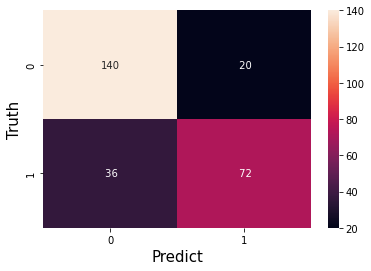

<Figure size 720x504 with 0 Axes>

In [55]:
sns.heatmap(cmLR, annot=True, fmt='3.0f')
plt.xlabel('Predict', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.figure(figsize=(10, 7))

The cross validated score for Logistic REgression is: 79.13


Text(0.5, 1.05, 'Confusion_matrix')

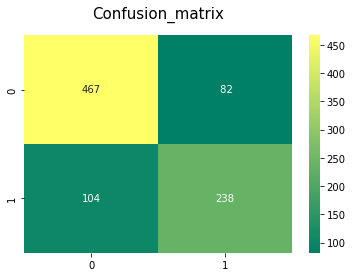

In [68]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(modelLR,x,y,cv=10,scoring='accuracy')
print('The cross validated score for Logistic REgression is:',round(result_lr.mean()*100,2))
y_predLR = cross_val_predict(modelLR, x, y, cv=10)
sns.heatmap(confusion_matrix(y, y_predLR),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [57]:
y_predictLR1 = modelLR.predict(df2)
#y_predictLR1

In [58]:
#modelRFC = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=10)
modelRFC = RandomForestClassifier( n_estimators=200, max_depth=100)
modelRFC.fit(x_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=200)

In [59]:
y_predictRFC = modelRFC.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictRFC)
accuracy
#0.8258426966292135

0.8022388059701493

In [60]:
cmRFC = confusion_matrix(y_test, y_predictRFC)
cmRFC

array([[139,  21],
       [ 32,  76]], dtype=int64)

In [69]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_rfc=cross_val_score(modelRFC,x,y,cv=10,scoring='accuracy')
print('The cross validated score for Logistic REgression is:',round(result_rfc.mean()*100,2))
y_predLR = cross_val_predict(modelRFC, x, y, cv=10)
sns.heatmap(confusion_matrix(y, y_predictRFC),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

The cross validated score for Logistic REgression is: 83.39


ValueError: Found input variables with inconsistent numbers of samples: [891, 268]

In [207]:
y_predictRFC1 = modelRFC.predict(df2)
y_predictRFC1

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [208]:
modelXGB = xgb.XGBClassifier(learning_rate=0.05, max_depth=3, random_state=5, n_estimators=50,
                             colsample_bytree=0.8) 
modelXGB.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=5, ...)

In [209]:
y_predictXGB = modelXGB.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictXGB)
accuracy
#0.8286516853932584

0.8258426966292135

In [210]:
y_predictXGB1 = modelXGB.predict(df2)
y_predictXGB1

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [211]:
kf=KFold(n_splits=3)
score=cross_val_score(modelXGB,x_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.80337079 0.81460674 0.84180791]
Average Cross Validation score :0.8199284792314692


In [212]:
#submission1 = pd.read_csv('C:/Users/jpadmanabhan/Downloads/gender_submission.csv')
#submission1['Survived'] = y_predictXGB1
#submission1.to_csv('submission1.csv', index=False)

In [213]:
cm = confusion_matrix(y_test, y_predictRFC)
cm

array([[195,  28],
       [ 37,  96]], dtype=int64)

<Figure size 720x504 with 0 Axes>

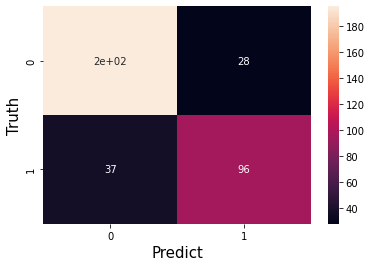

<Figure size 720x504 with 0 Axes>

In [214]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predict', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.figure(figsize=(10, 7))

In [215]:
df7

NameError: name 'df7' is not defined

In [216]:
final_output = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': y_predictLR1})
final_output.to_csv('submission2.csv', index=False)

In [217]:
features = ["Sex","Pclass","SibSp","Parch"]
train_x = pd.get_dummies(x_train[features])
test_x= pd.get_dummies(x_test[features])
clf = RandomForestClassifier( n_estimators=20, max_depth=5)
classif = clf.fit(train_x, y_train)
pred = classif.predict(test_x)
score = cross_val_score(clf, test_x, pred)
print('Cross validation score',score)
pred = pred.astype(int)

Cross validation score [1.         0.98591549 0.95774648 0.95774648 0.98591549]


In [149]:
display(pred)
output = pd.DataFrame({'PassengerId': x_test.PassengerId, 'Survived': pred})
output

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

,PassengerId,Survived
348,349,0
561,562,0
790,791,0
836,837,0
56,57,1
...,...,...
688,689,0
96,97,0
291,292,1
35,36,1


In [153]:
df5

NameError: name 'df5' is not defined